## Sequence dataset generation

### Reading data

Reading pre-processed Uniprot data for all organisms:

In [1]:
from subpred.util import load_df

sequences = load_df("uniprot")
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
A0A0C5B5G6,MT-RNR1,Mitochondrial-derived peptide MOTS-c (Mitochon...,True,1,MRWQEMGYIFYPRKLR,9606
A0A1B0GTW7,CIROP LMLN2,Ciliated left-right organizer metallopeptidase...,True,1,MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...,9606
A0JNW5,BLTP3B KIAA0701 SHIP164 UHRF1BP1L,Bridge-like lipid transfer protein family memb...,True,1,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...,9606
A0JP26,POTEB3,POTE ankyrin domain family member B3,True,1,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...,9606
A0PK11,CLRN2,Clarin-2,True,1,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,9606
...,...,...,...,...,...,...
X5L4R4,NOD-2,Nucleotide-binding oligomerization domain-cont...,False,2,MSPGCYKGWPFNCHLSHEEDKRRNETLLQEAETSNLQITASFVSGL...,586796
X5MBL2,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,KVLYDRAFNSSDDQSALVYLLLKEKDKWADRIFIEHKYYLNGYWLD...,3352
X5MFI4,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,MDEDVLCKGPLHGGSARSLKGSLKRLKRIMESLNDGLIFMGGAVSA...,3352


### Selecting organism

Filtering for *E. Coli* Strain K12: 

In [2]:
sequences = sequences[sequences.organism_id == 83333]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333
P33668,ybbC b0498 JW0487,Uncharacterized protein YbbC,True,2,MKYSSIFSMLSFFILFACNETAVYGSDENIIFMRYVEKLHLDKYSV...,83333


### Filtering

Keeping proteins that have been manually reviewed, or have sequence evidence at protein level:

In [3]:
sequences = sequences[(sequences.protein_existence == 1) | (sequences.reviewed)]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Sequence clustering the proteins:

The clustering at 70% sequence identity does not remove a lot of proteins for *E. coli*. This is different for other organisms. 

In [4]:
from subpred.cdhit import cd_hit

clusters = cd_hit(sequences=sequences.sequence, identity_threshold=70)
sequences = sequences.loc[clusters]
sequences

cd-hit: clustered 3277 sequences into 3236 clusters at threshold 70


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P77564,ydhW b1672 JW1662,Uncharacterized protein YdhW,True,2,MGKMNHQDELPLAKVSEVDEAKRQWLQGMRHPVDTVTEPEPAEILA...,83333
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Filtering for transmembrane transporters using GO

#### Loading all GO Uniprot annotations

Read pre-processed Uniprot GO annotations:

In [5]:
go_annotations_uniprot = load_df("go")
go_annotations_uniprot


,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A009FND8,enables,GO:0000166,IEA,F
1,A0A009FND8,enables,GO:0005524,IEA,F
2,A0A009FND8,enables,GO:0051082,IEA,F
3,A0A009FND8,enables,GO:0140662,IEA,F
4,A0A009FND8,involved_in,GO:0006457,IEA,P
...,...,...,...,...,...
7452013,Z9JND5,enables,GO:0000166,IEA,F
7452014,Z9JND5,enables,GO:0005524,IEA,F
7452015,Z9JND5,enables,GO:0051082,IEA,F
7452016,Z9JND5,enables,GO:0140662,IEA,F


#### Dataset of transmembrane transport GO terms in E Coli

- Used to filter proteins for transmembrane transporters

**Creating dataset of transporter GO term annotations**

Filter for GO terms that are descendants of "transmembrane transporter activity

GO annotations for the clustered sequence dataset from *E Coli.*

In [6]:
from subpred.ontology import GeneOntology, GO_FILE

go_owl = GeneOntology(GO_FILE)
transmembrane_transport_go_terms = go_owl.get_descendants(
    go_owl.get_identifier("transmembrane transporter activity")
)
# filter GO annotations for descendants of transmembrane transporter activity
go_annotations_tmtp = go_annotations_uniprot[
    go_annotations_uniprot.go_id.isin(transmembrane_transport_go_terms)
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A014M993,enables,GO:0015288,IEA,F
1,A0A014M993,enables,GO:0015481,IEA,F
2,A0A014M993,enables,GO:0042958,IEA,F
3,A0A022PEV8,enables,GO:0015288,IEA,F
4,A0A022PEV8,enables,GO:0015481,IEA,F
...,...,...,...,...,...
94155,X5M917,enables,GO:0022857,IBA,F
94156,Z4YKJ7,enables,GO:0015172,IEA,F
94157,Z4YKJ7,enables,GO:0015179,IEA,F
94158,Z4YKJ7,enables,GO:0015293,IEA,F


In [7]:
# add ancestors of all remaining terms
go_annotations_tmtp = go_annotations_tmtp.assign(
    ancestors=go_annotations_tmtp.go_id.transform(
        lambda go_id: go_owl.get_ancestors(go_id)
    )
)
assert go_annotations_tmtp.apply(lambda row: row.go_id in row.ancestors, axis=1).all()
go_annotations_tmtp


,Uniprot,qualifier,go_id,evidence_code,aspect,ancestors
0,A0A014M993,enables,GO:0015288,IEA,F,"{GO:0022829, GO:0003674, GO:0022857, GO:000521..."
1,A0A014M993,enables,GO:0015481,IEA,F,"{GO:0015144, GO:0015481, GO:0022829, GO:000367..."
2,A0A014M993,enables,GO:0042958,IEA,F,"{GO:0015144, GO:0022884, GO:0003674, GO:004295..."
3,A0A022PEV8,enables,GO:0015288,IEA,F,"{GO:0022829, GO:0003674, GO:0022857, GO:000521..."
4,A0A022PEV8,enables,GO:0015481,IEA,F,"{GO:0015144, GO:0015481, GO:0022829, GO:000367..."
...,...,...,...,...,...,...
94155,X5M917,enables,GO:0022857,IBA,F,"{GO:0005215, GO:0022857, GO:0003674}"
94156,Z4YKJ7,enables,GO:0015172,IEA,F,"{GO:0003674, GO:0015172, GO:0046943, GO:002285..."
94157,Z4YKJ7,enables,GO:0015179,IEA,F,"{GO:0003674, GO:0046943, GO:0022857, GO:000521..."
94158,Z4YKJ7,enables,GO:0015293,IEA,F,"{GO:0015291, GO:0003674, GO:0022857, GO:002280..."


In [8]:
# add ancestor annotations
go_annotations_tmtp = (
    go_annotations_tmtp.drop("go_id", axis=1)
    .rename(columns={"ancestors": "go_id"})
    .explode("go_id")
)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0022829
0,A0A014M993,enables,IEA,F,GO:0003674
0,A0A014M993,enables,IEA,F,GO:0022857
0,A0A014M993,enables,IEA,F,GO:0005215
0,A0A014M993,enables,IEA,F,GO:0015288
...,...,...,...,...,...
94159,Z4YKJ7,enables,IEA,F,GO:0005342
94159,Z4YKJ7,enables,IEA,F,GO:0015075
94159,Z4YKJ7,enables,IEA,F,GO:0003674
94159,Z4YKJ7,enables,IEA,F,GO:0022890


In [9]:
# filter GO annotations and their ancestors for descendants of transmembrane transporter activity again
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.go_id.isin(transmembrane_transport_go_terms)
].reset_index(drop=True)
go_annotations_tmtp = go_annotations_tmtp.drop_duplicates().reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0022829
1,A0A014M993,enables,IEA,F,GO:0022857
2,A0A014M993,enables,IEA,F,GO:0015288
3,A0A014M993,enables,IEA,F,GO:0015267
4,A0A014M993,enables,IEA,F,GO:0022803
...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0008324
581848,Z4YKJ7,enables,IEA,F,GO:0046873
581849,Z4YKJ7,enables,IEA,F,GO:0015075
581850,Z4YKJ7,enables,IEA,F,GO:0022890


In [10]:
# annotate with labels
go_annotations_tmtp = go_annotations_tmtp.assign(
    go_term=go_annotations_tmtp.go_id.transform(go_owl.get_label)
)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
1,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
2,A0A014M993,enables,IEA,F,GO:0015288,porin activity
3,A0A014M993,enables,IEA,F,GO:0015267,channel activity
4,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0008324,cation transmembrane transporter activity
581848,Z4YKJ7,enables,IEA,F,GO:0046873,metal ion transmembrane transporter activity
581849,Z4YKJ7,enables,IEA,F,GO:0015075,ion transmembrane transporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0022890,inorganic cation transmembrane transporter act...


In [11]:
# Filtering for qualifier. How many samples do we lose?
print(
    f"Percentage of transmembrane transporter annotations with enables qualifier: {go_annotations_tmtp[go_annotations_tmtp.qualifier == 'enables'].shape[0] / go_annotations_tmtp.shape[0] * 100:.3f}%"
)
go_annotations_tmtp = go_annotations_tmtp[go_annotations_tmtp.qualifier == "enables"]
go_annotations_tmtp


Percentage of transmembrane transporter annotations with enables qualifier: 97.408%


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
1,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
2,A0A014M993,enables,IEA,F,GO:0015288,porin activity
3,A0A014M993,enables,IEA,F,GO:0015267,channel activity
4,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0008324,cation transmembrane transporter activity
581848,Z4YKJ7,enables,IEA,F,GO:0046873,metal ion transmembrane transporter activity
581849,Z4YKJ7,enables,IEA,F,GO:0015075,ion transmembrane transporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0022890,inorganic cation transmembrane transporter act...


Before filtering for the electronically inferred IEA annotations, we will only keep annotations for the clustered *E. coli* sequence dataset above, to see what the actual difference in sample count is. *E. coli* is a model organism, and therefore there should be more experimentally verified annotations compared to the thousands of other organisms in the dataset with similar proteins. 

The percentage of IEA annotations in *E. coli* should be much lower than for the average Uniprot organism.

In [12]:
assert not sequences.duplicated().any()
f"% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: {sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)].shape[0]/sequences.shape[0]*100:.2f}%"


'% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: 14.52%'

In [13]:
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.Uniprot.isin(sequences.index)
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0015075,ion transmembrane transporter activity
1,A5A627,enables,IDA,F,GO:0015318,inorganic molecular entity transmembrane trans...
2,A5A627,enables,IDA,F,GO:0005253,anion channel activity
3,A5A627,enables,IDA,F,GO:0022857,transmembrane transporter activity
4,A5A627,enables,IDA,F,GO:0005216,ion channel activity
...,...,...,...,...,...,...
7374,Q6BEX0,enables,IEA,F,GO:0140359,ABC-type transporter activity
7375,Q6BEX0,enables,IEA,F,GO:0005354,galactose transmembrane transporter activity
7376,Q6BEX0,enables,IEA,F,GO:0051119,sugar transmembrane transporter activity
7377,Q6BEX0,enables,IEA,F,GO:0015145,monosaccharide transmembrane transporter activity


<AxesSubplot:>

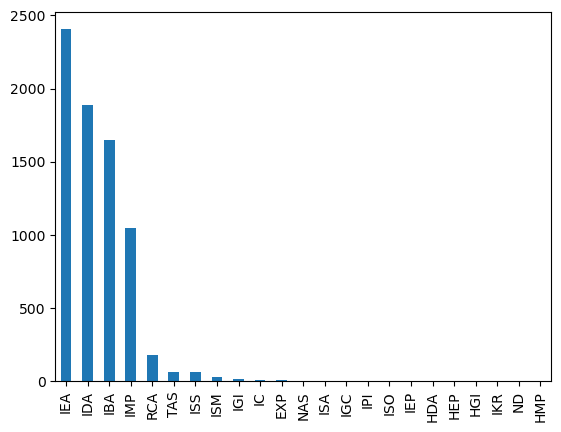

In [14]:
# filter for evidence code. how many samples do we lose?
go_annotations_tmtp.evidence_code.value_counts().plot.bar()


Most annotations have experimental evidence!

<AxesSubplot:>

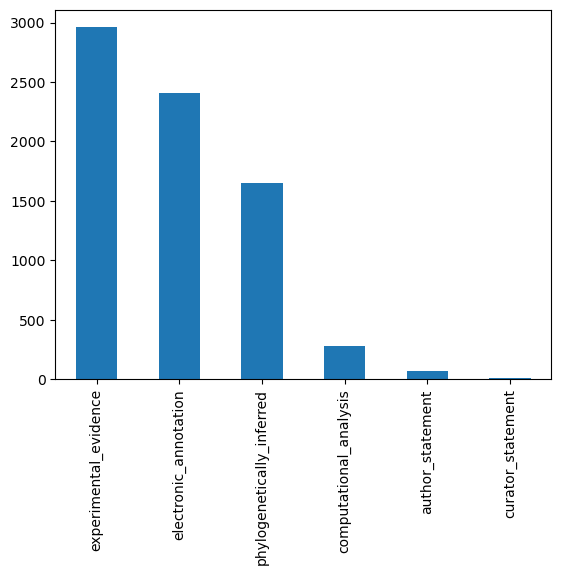

In [15]:
from subpred.ontology import EVIDENCE_CODE_TO_DESCRIPTION

go_annotations_tmtp.evidence_code.map(
    EVIDENCE_CODE_TO_DESCRIPTION
).value_counts().plot.bar()


Another point is that the GO annotation dataset also contains Uniprot annotations assigned by InterPro. There can be cases where the same annotation is in the dataset twice, where one of those annotations has an IEA annotation while the other one does not. What is the actual difference?

In [16]:
tmp = (
    go_annotations_tmtp[go_annotations_tmtp.evidence_code != "IEA"]
    .drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
print(
    f"Without IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins."
)
tmp = (
    go_annotations_tmtp.drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
print(
    f"With IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins."
)


Without IEA terms: 3348 annotations in 357 proteins.
With IEA terms: 4172 annotations in 470 proteins.


For now, we will filter out the IEA terms and only keep the verified data.

In [17]:
# filter for evidence codes:
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.evidence_code != "IEA"
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0015075,ion transmembrane transporter activity
1,A5A627,enables,IDA,F,GO:0015318,inorganic molecular entity transmembrane trans...
2,A5A627,enables,IDA,F,GO:0005253,anion channel activity
3,A5A627,enables,IDA,F,GO:0022857,transmembrane transporter activity
4,A5A627,enables,IDA,F,GO:0005216,ion channel activity
...,...,...,...,...,...,...
4969,Q59385,enables,IBA,F,GO:0015399,primary active transmembrane transporter activity
4970,Q59385,enables,IBA,F,GO:0046873,metal ion transmembrane transporter activity
4971,Q59385,enables,IBA,F,GO:0015075,ion transmembrane transporter activity
4972,Q59385,enables,IBA,F,GO:0019829,ATPase-coupled cation transmembrane transporte...


Now, there are still some annotations left with identical uniprot accession and go term, but different evidence codes. This happens because the GO dataset contains annotations made both by Uniprot and by InterPro, and they can assign different evidence codes. The next step is to remove the columns that we no longer need, and delete duplicates:

In [18]:
go_annotations_tmtp = (
    go_annotations_tmtp.drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)


In [19]:
# make backup of entire (filtered) genome, since we need a reference set later for the annotations
sequences_all = sequences.copy()
sequences = sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)]
sequences


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333


#### 

## Feature generation

Here, we will use PSSM and protein embeddings features to encode the protein sequences into vectors of length *n*.

### ProtNLM

One of the most reliable features at the moment seems to be ProtNLM, which provides NLP embeddings for individual proteins. Swissprot has pre-calculated embeddings for all *E. Coli* proteins available for download. 

There is also ProtT5, which can be calcualted for new proteins.

In [20]:
import h5py
import pandas as pd
import numpy as np


def read_uniprot_embedding(h5_path: str):
    with h5py.File(h5_path, "r") as file:
        embeddings_dict = {
            sequence_id: np.array(embedding) for sequence_id, embedding in file.items()
        }
        return pd.DataFrame.from_dict(embeddings_dict, orient="index")


feature_protnlm = read_uniprot_embedding("/home/ad/protnlm_test/ecoli-per-protein.h5")
feature_protnlm


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
A0A385XJ53,0.061157,0.082031,0.001612,0.039703,-0.020401,0.034180,-0.004898,-0.057495,0.023514,-0.089600,...,0.032349,-0.059021,-0.021179,-0.051971,0.054962,-0.005638,-0.088074,-0.094727,-0.043701,-0.071533
A0A385XJE6,0.047943,0.122864,0.007145,0.014442,0.024536,0.034729,-0.040802,-0.031281,0.009224,-0.065063,...,-0.004765,0.001526,0.021637,-0.024689,0.042328,-0.009949,-0.060638,-0.045258,-0.067078,0.024902
A0A385XJK5,0.050293,0.093811,-0.043182,-0.043671,-0.029007,-0.071594,0.019318,-0.126831,0.006989,-0.072693,...,0.045349,-0.014725,0.029755,-0.141113,-0.025711,0.098572,-0.029022,0.077271,-0.000576,-0.016922
A0A385XJL2,0.039551,0.090271,-0.019913,0.009315,-0.047882,-0.038605,0.059692,-0.034180,0.008598,-0.089661,...,0.049866,-0.025406,0.007912,-0.066223,0.031174,0.077637,0.030319,0.118652,0.055847,-0.060638
A0A385XJL4,0.008354,0.159546,0.024719,0.047485,0.031525,0.043854,-0.046173,-0.039490,0.017197,-0.031097,...,-0.040344,-0.025070,0.058197,-0.053284,0.074280,-0.032410,-0.082153,-0.038849,-0.109070,-0.011330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q93K97,0.043854,0.006367,-0.031769,0.036469,0.020828,0.040802,-0.007046,-0.109863,0.037109,-0.007458,...,-0.020798,0.034088,0.026230,-0.078735,0.013145,0.006065,-0.043488,-0.061035,-0.018387,-0.012543
Q9XB42,-0.001819,0.088806,-0.038422,0.023849,-0.067871,0.024200,0.062622,-0.184937,0.071777,0.039307,...,0.045532,-0.050568,-0.017609,-0.083496,-0.017700,0.008072,-0.038635,0.016205,0.038605,0.015205
Q9Z3A0,0.006672,0.109619,-0.061584,0.024643,-0.006783,-0.079468,-0.015144,-0.142212,0.071228,0.038208,...,0.029312,0.003822,0.022324,-0.174927,0.006115,0.036255,-0.054504,-0.008636,-0.030502,0.061249
U3PVA8,0.036987,-0.017639,-0.028152,-0.019852,0.025330,0.019958,0.012833,-0.129395,-0.018860,-0.003590,...,-0.029663,0.032928,0.026566,-0.147827,-0.055145,-0.061310,0.017197,0.147217,0.019318,-0.080444


**How many proteins in the dataset have embeddings available in the dataset?**


In [21]:
print(
    f"embeddings are available for {len(set(sequences.index) & set(feature_protnlm.index))}/{len(set(sequences.index))} of proteins in the dataset"
)


embeddings are available for 357/357 of proteins in the dataset


**Final feature dataset:**

In [22]:
feature_protnlm = feature_protnlm.loc[
    list(set(sequences.index) & set(feature_protnlm.index))
]
feature_protnlm


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
P77272,0.012863,0.075989,0.036957,0.022156,-0.008316,0.039520,-0.013748,-0.064697,0.059967,-0.026489,...,-0.029709,0.005386,0.007175,-0.029785,0.032562,-0.022171,-0.020111,0.040985,-0.017288,0.011353
P0AAE8,0.022156,0.132080,0.032715,0.042572,-0.004620,0.016479,-0.039368,-0.010170,0.022003,-0.060242,...,-0.001358,-0.037842,-0.010117,-0.015373,0.041901,-0.032928,-0.048950,-0.014740,-0.008118,-0.000620
P37617,0.039154,0.049683,0.019958,0.072632,0.013542,0.018433,-0.029297,-0.076843,0.056854,-0.002657,...,-0.019272,-0.002869,-0.025833,-0.027130,0.001789,-0.043213,-0.051575,-0.000153,-0.044647,0.025406
P32135,-0.010201,0.020767,0.006180,-0.001478,0.005440,0.012856,-0.027145,-0.004665,-0.000397,-0.029663,...,-0.028763,-0.038422,-0.014893,-0.093628,0.036133,0.014381,-0.023941,-0.042053,0.025742,-0.004257
P0AFF0,0.033051,0.088989,0.023438,0.066101,-0.052155,-0.021606,-0.011993,-0.019547,0.028503,-0.070984,...,-0.023438,0.004807,0.022018,-0.049438,-0.001275,-0.014069,-0.005836,0.032166,-0.041382,0.030121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0ABA0,0.021393,-0.026505,-0.027542,0.035248,0.015617,-0.022156,0.033569,-0.074951,0.034729,-0.017532,...,-0.023270,-0.001267,-0.021072,-0.064636,-0.021973,-0.035950,-0.040009,0.024368,0.039642,0.008995
P0AG96,0.034698,-0.008789,0.035400,0.041809,0.005848,-0.036987,-0.048767,-0.050079,-0.003494,-0.010368,...,-0.033630,0.042786,0.040375,-0.111572,-0.081299,-0.016968,-0.074768,0.001659,-0.029083,-0.005737
P68187,0.051849,0.055023,-0.018433,0.027618,0.004253,-0.021103,-0.055115,-0.061676,0.012878,-0.010895,...,-0.033051,0.017075,-0.026245,-0.046478,0.057007,-0.023117,-0.056091,-0.037048,-0.050201,0.013084
P06609,0.048340,0.084473,0.048187,0.029724,-0.008453,-0.041168,-0.004150,-0.062286,0.041199,-0.014496,...,-0.003483,-0.004196,-0.012718,-0.039917,-0.025848,-0.048218,-0.056427,-0.011467,-0.030441,-0.036285


### PSSM

At the moment, the PSSMs for Uniref90 with three iterations are still being calculated. We will use the Uniref50 PSSMs with three iterations as an example. We have only calculated PSSMs for proteins that are annotated with the GO term *transmembrane transporter activity* or one of its descendant GO terms, therefore we first have to filter for that. 

In [23]:
from subpred.pssm import calculate_pssm_feature

feature_pssm = calculate_pssm_feature(
    sequences=sequences.sequence,
    tmp_folder="../data/intermediate/blast/pssm_uniref50_3it/",
    blast_db="../data/raw/uniref/uniref50/uniref50.fasta",
    iterations=3,
    verbose=False,
)
feature_pssm


,AA,AR,AN,AD,AC,AQ,AE,AG,AH,AI,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
P02916,0.819672,0.370902,0.387295,0.325820,0.336066,0.397541,0.350410,0.530738,0.319672,0.497951,...,0.665984,0.415984,0.633197,0.594262,0.411885,0.510246,0.606557,0.446721,0.508197,0.725410
P03959,0.936430,0.342298,0.420538,0.322738,0.586797,0.386308,0.344743,0.616137,0.371638,0.501222,...,0.660147,0.337408,0.745721,0.647922,0.418093,0.559902,0.603912,0.518337,0.518337,0.792176
P05825,0.724662,0.339527,0.407095,0.371622,0.234797,0.385135,0.337838,0.530405,0.315878,0.378378,...,0.592905,0.290541,0.500000,0.530405,0.300676,0.398649,0.496622,0.427365,0.423986,0.717905
P0AA78,1.000000,0.050773,0.185430,0.000000,0.423841,0.161148,0.070640,0.724062,0.030905,0.596026,...,0.790287,0.384106,0.735099,0.688742,0.419426,0.551876,0.622517,0.571744,0.474614,0.805740
P0AAD6,0.787425,0.281437,0.419162,0.215569,0.541916,0.299401,0.251497,0.565868,0.323353,0.661677,...,0.703593,0.338323,0.706587,0.682635,0.356287,0.535928,0.568862,0.544910,0.592814,0.781437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P77328,0.739726,0.469178,0.493151,0.452055,0.559932,0.503425,0.460616,0.695205,0.457192,0.635274,...,0.691781,0.460616,0.698630,0.655822,0.503425,0.635274,0.667808,0.479452,0.515411,0.789384
P76198,0.817708,0.338542,0.361979,0.192708,0.447917,0.375000,0.257812,0.726562,0.291667,0.643229,...,0.768229,0.354167,0.789062,0.783854,0.403646,0.598958,0.679687,0.554688,0.549479,0.807292
P33011,0.790368,0.456091,0.368272,0.373938,0.456091,0.433428,0.424929,0.504249,0.416431,0.563739,...,0.708215,0.359773,0.594901,0.558074,0.362606,0.481586,0.572238,0.475921,0.475921,0.682720
P37327,0.878543,0.129555,0.178138,0.161943,0.364372,0.251012,0.194332,0.603239,0.165992,0.429150,...,0.647773,0.344130,0.639676,0.554656,0.348178,0.465587,0.599190,0.469636,0.461538,0.821862


## Annotation datasets

Here, we create gene/protein annotation datasets. Later, these annotations will be used for calculating enrichment in clusters.

### GO


Preprocessing:

In [24]:
go_annotations_uniprot = load_df("go")
# filter for proteins in our e coli dataset
go_annotations_ecoli = go_annotations_uniprot[
    go_annotations_uniprot.Uniprot.isin(sequences_all.index)
].reset_index(drop=True)

# add ancestors
go_annotations_ecoli = go_annotations_ecoli.assign(
    ancestors=go_annotations_ecoli.go_id.transform(
        lambda go_id: go_owl.get_ancestors(go_id)
    )
)
assert go_annotations_ecoli.apply(lambda row: row.go_id in row.ancestors, axis=1).all()
go_annotations_ecoli = (
    go_annotations_ecoli.explode("ancestors")
    .drop("go_id", axis=1)
    .rename(columns={"ancestors": "go_id"})
    .drop_duplicates()
    .reset_index(drop=True)
)
go_annotations_ecoli


,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A0A6YVN8,enables,IEA,F,GO:0043167
1,A0A0A6YVN8,enables,IEA,F,GO:0003674
2,A0A0A6YVN8,enables,IEA,F,GO:0005488
3,A0A0A6YVN8,enables,IEA,F,GO:0043169
4,A0A0A6YVN8,enables,IEA,F,GO:0046872
...,...,...,...,...,...
270350,Q93K97,located_in,HDA,C,GO:0005829
270351,Q93K97,located_in,HDA,C,GO:0110165
270352,Q93K97,located_in,IDA,C,GO:0005575
270353,Q93K97,located_in,IDA,C,GO:0005829


Evidence codes:

Only about 30% of annotations have evidence code IEA, and some of those might even have non-IEA duplicates in the dataset, since the annotations stem from multiple sources. We can remove the IEA terms.

Text(0, 0.5, 'percentage')

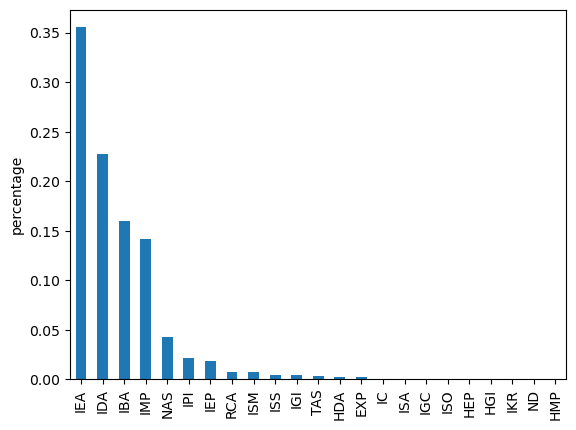

In [25]:
# filter/analyze evidence codes
g = go_annotations_ecoli.evidence_code.value_counts(normalize=True).plot.bar()
g.set_ylabel("percentage")


In [26]:
go_annotations_ecoli = (
    go_annotations_ecoli[go_annotations_ecoli.evidence_code != "IEA"]
    .drop("evidence_code", axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
go_annotations_ecoli


,Uniprot,qualifier,aspect,go_id
0,A5A615,located_in,C,GO:0005886
1,A5A615,located_in,C,GO:0016020
2,A5A615,located_in,C,GO:0005575
3,A5A615,located_in,C,GO:0110165
4,A5A616,acts_upstream_of_or_within,P,GO:0071496
...,...,...,...,...
138480,Q93K97,is_active_in,C,GO:0005829
138481,Q93K97,is_active_in,C,GO:0110165
138482,Q93K97,located_in,C,GO:0005575
138483,Q93K97,located_in,C,GO:0005829


In [27]:
go_annotations_ecoli = go_annotations_ecoli[
    ~go_annotations_ecoli.qualifier.str.startswith("NOT")
].reset_index(drop=True)
go_annotations_ecoli


,Uniprot,qualifier,aspect,go_id
0,A5A615,located_in,C,GO:0005886
1,A5A615,located_in,C,GO:0016020
2,A5A615,located_in,C,GO:0005575
3,A5A615,located_in,C,GO:0110165
4,A5A616,acts_upstream_of_or_within,P,GO:0071496
...,...,...,...,...
138361,Q93K97,is_active_in,C,GO:0005829
138362,Q93K97,is_active_in,C,GO:0110165
138363,Q93K97,located_in,C,GO:0005575
138364,Q93K97,located_in,C,GO:0005829


What qualifiers are assigned to the individual aspects?

- Looks good, we can filter later

In [28]:
for aspect in ["C", "P", "F"]:
    print("###", aspect)
    print(
        go_annotations_ecoli[go_annotations_ecoli.aspect == aspect]
        .qualifier.astype("str")
        .value_counts()
        .to_string()
    )

### C
located_in          11217
is_active_in         3364
part_of              2683
colocalizes_with        7
### P
acts_upstream_of_or_within    49569
involved_in                   41647
acts_upstream_of                  8
### F
enables           29318
contributes_to      553


Here, we remove some of the less common and less accurate qualifiers. This did not seem to have a major impact on the final results and conclusions.

In [29]:
go_annotations_ecoli = go_annotations_ecoli[~go_annotations_ecoli.qualifier.isin(["contributes_to", "colocalizes_with", "acts_upstream_of"])]
go_annotations_ecoli.qualifier.value_counts()

acts_upstream_of_or_within                        49569
involved_in                                       41647
enables                                           29318
located_in                                        11217
is_active_in                                       3364
part_of                                            2683
acts_upstream_of_positive_effect                      0
NOT|acts_upstream_of                                  0
NOT|acts_upstream_of_or_within_negative_effect        0
acts_upstream_of_or_within_negative_effect            0
acts_upstream_of_negative_effect                      0
NOT|part_of                                           0
NOT|contributes_to                                    0
NOT|colocalizes_with                                  0
acts_upstream_of                                      0
acts_upstream_of_or_within_positive_effect            0
NOT|acts_upstream_of_or_within                        0
NOT|enables                                     

Annotating the dataset with labels of GO terms:

In [30]:
go_annotations_ecoli = go_annotations_ecoli.assign(
    go_term=go_annotations_ecoli.go_id.map(go_owl.get_label)
)
go_annotations_ecoli

,Uniprot,qualifier,aspect,go_id,go_term
0,A5A615,located_in,C,GO:0005886,plasma membrane
1,A5A615,located_in,C,GO:0016020,membrane
2,A5A615,located_in,C,GO:0005575,cellular_component
3,A5A615,located_in,C,GO:0110165,cellular anatomical entity
4,A5A616,acts_upstream_of_or_within,P,GO:0071496,cellular response to external stimulus
...,...,...,...,...,...
138361,Q93K97,is_active_in,C,GO:0005829,cytosol
138362,Q93K97,is_active_in,C,GO:0110165,cellular anatomical entity
138363,Q93K97,located_in,C,GO:0005575,cellular_component
138364,Q93K97,located_in,C,GO:0005829,cytosol


### Keywords

In [31]:
keywords_uniprot = load_df("keywords")
keywords_ecoli = (
    keywords_uniprot[keywords_uniprot.Uniprot.isin(sequences_all.index)]
    .drop_duplicates()
    .reset_index(drop=True)
)
keywords_ecoli

,Uniprot,keyword
0,P00509,3D-structure
1,P00509,Aminotransferase
2,P00509,Cytoplasm
3,P00509,Direct protein sequencing
4,P00509,Pyridoxal phosphate
...,...,...
23130,P0AEG8,Reference proteome
23131,P33668,Reference proteome
23132,P33668,Signal
23133,A0A0A6YVN8,3D-structure


### Interpro

In [32]:
interpro_all = load_df("interpro")
interpro_ecoli = interpro_all[
    interpro_all.Uniprot.isin(sequences_all.index)
].reset_index(drop=True)
interpro_ecoli


,Uniprot,interpro_id
0,P00509,IPR004839
1,P00509,IPR000796
2,P00509,IPR004838
3,P00509,IPR015424
4,P00509,IPR015421
...,...,...
12755,P77296,IPR011990
12756,P0AEG8,IPR019717
12757,P33668,IPR028921
12758,A0A0A6YVN8,IPR036237


### TCDB

In [33]:
tcdb_all = load_df("tcdb_substrates")
tcdb_ecoli = (
    tcdb_all[
        (tcdb_all.variable == "Uniprot") & (tcdb_all.value.isin(sequences_all.index))
    ]
    .drop_duplicates()
    .reset_index(drop=True)
    .drop("variable", axis=1)
    .rename(columns={"value": "Uniprot"})[["Uniprot", "tcdb_id"]]
)
tcdb_ecoli


,Uniprot,tcdb_id
0,P00803,9.B.391.1.3
1,P02916,3.A.1.1.1
2,P02925,3.A.1.2.1
3,P02929,2.C.1.1.1
4,P03959,3.A.3.7.1
...,...,...
702,Q46909,2.A.1.1.95
703,P28303,2.A.66.1.4
704,C1P611,1.C.135.1.1
705,P23481,3.D.1.9.1


In [34]:
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333


## Kmeans Clustering

What is the optimal number *k* of clusters?

In [35]:
from subpred.clustering import clustering_quality_plots

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

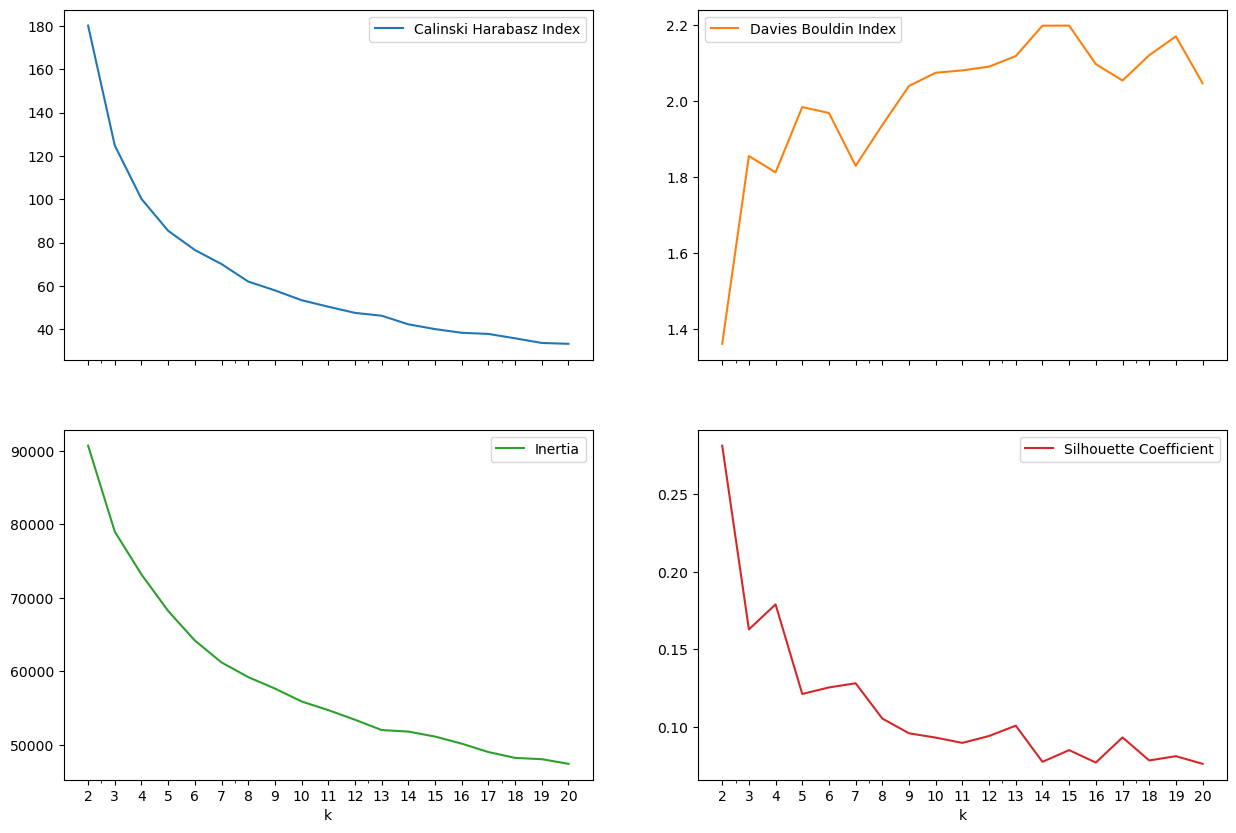

In [36]:
clustering_quality_plots(feature_pssm)

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

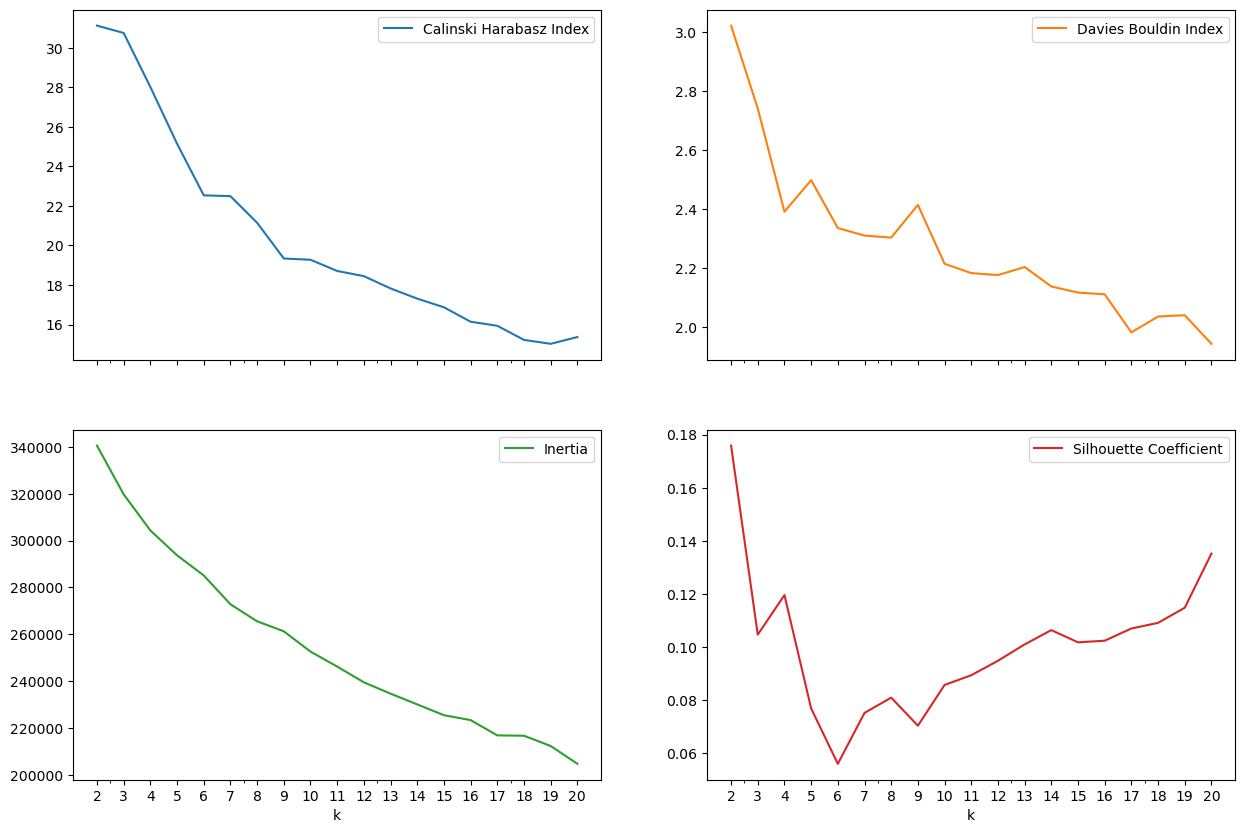

In [37]:
clustering_quality_plots(feature_protnlm)

It actually looks like PSSM works better! But none of the metrics look particularly good, we should look at a dendrogram.

## Hierarchical clustering using PSSMs

We will try hierarchical clustering first in order to find good annotations to create clusters, then try KMeans again. The clustering looks better when using PSSM instead of embeddings.

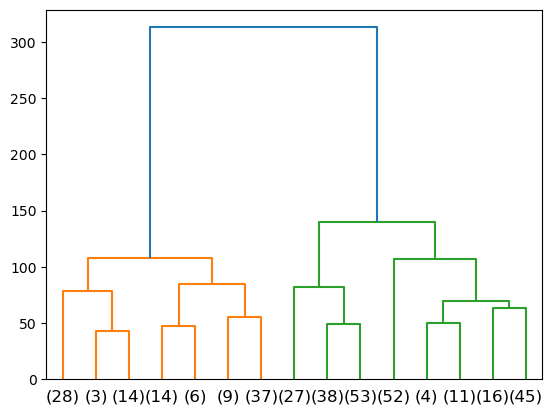

In [38]:
from subpred.clustering import get_linkage, dendrogram_plot, get_cluster_labels

linkage = get_linkage(feature_pssm)
dendrogram = dendrogram_plot(linkage, 15)

#### Analyzing the two clusters

It seems like there are two very obvious clusters. What are they?

In [43]:
labels_twoclusters = get_cluster_labels(linkage, n_clusters=2, index=feature_pssm.index.tolist())
labels_twoclusters

P02916    2
P03959    2
P05825    1
P0AA78    2
P0AAD6    2
         ..
P77328    2
P76198    2
P33011    2
P37327    2
P39282    2
Length: 357, dtype: int32

In [42]:
labels_twoclusters.value_counts()

2    246
1    111
dtype: int64

##### Creating annotation datasets for enrichment analysis

In [48]:
# TODO do this to the dataframes directly?
keywords = list(keywords_ecoli.to_records(index=False))
tmp = go_annotations_ecoli.drop("qualifier", axis=1).melt(
    id_vars=["Uniprot", "aspect"], value_vars=["go_id", "go_term"]
)
tmp = tmp[tmp.variable == "go_term"].drop_duplicates().reset_index(drop=True)
go_mf = (
    tmp[tmp.aspect == "F"]
    .drop(["aspect","variable"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
go_bp = (
    tmp[tmp.aspect == "P"]
    .drop(["aspect","variable"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
go_cc = (
    tmp[tmp.aspect == "C"]
    .drop(["aspect","variable"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
go_all = (
    tmp
    .drop(["aspect","variable"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
del tmp
go_mf


tcdb_class = tcdb_ecoli.assign(tcdb_class = tcdb_ecoli.tcdb_id.transform(lambda x: x[:3]))[["Uniprot", "tcdb_class"]].to_records(index=False).tolist()

##### Enrichment analysis

In [51]:
# TODO new method that takes reference set, subset and annotation set
# TODO which reference set? Whole genome or transporters
# TODO better way to visualize this?

from subpred.enrichment_analysis import enrichment_analysis

def analyze_clusters(
    labels: pd.Series,
    reference_set: set,
    annotation_data,
    p_cutoff:float = 0.05
):
    labels_dict = {
        f"CLUSTER {i}": set(labels[labels == i].index.tolist())
        for i in sorted(labels.unique())
    }

    for cluster_name, cluster_set in labels_dict.items():
        print("=" * 50)
        print(cluster_name)
        print("=" * 50)
        res = enrichment_analysis(
            proteins_reference=reference_set,
            proteins_subset=cluster_set,
            annotations=annotation_data,
            p_cutoff=p_cutoff,
            # min_lfc=1
        ).reset_index(drop=True)
        display(res)
        print(res.shape)


# protein sets (accessions)
reference_set = set(sequences_all.index.unique().to_list())
analyze_clusters(labels=labels_twoclusters, reference_set = set(sequences.index.unique().to_list()), annotation_data=go_all)
analyze_clusters(labels=labels_twoclusters, reference_set = set(sequences.index.unique().to_list()), annotation_data=go_mf)


CLUSTER 1


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,0.000001,0.000002
1,cell outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,0.000001,0.000002
2,binding,357,119,111,59,37.000000,49.58,0.673190,1.321832e-07,0.000037,0.000112
3,periplasmic space,357,16,111,14,4.974790,87.50,1.492719,2.822946e-06,0.000531,0.002391
4,outer membrane-bounded periplasmic space,357,16,111,14,4.974790,87.50,1.492719,2.822946e-06,0.000531,0.002391
5,wide pore channel activity,357,19,111,15,5.907563,78.95,1.344327,1.399789e-05,0.001824,0.011856
6,porin activity,357,19,111,15,5.907563,78.95,1.344327,1.399789e-05,0.001824,0.011856
7,channel activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.003715,0.031576
8,passive transmembrane transporter activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.003715,0.031576
9,protein binding,357,77,111,38,23.941176,49.35,0.666505,1.158074e-04,0.009809,0.098089


(24, 11)
CLUSTER 2


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,246,222,196.386555,77.89,0.176864,2.190972e-12,2.475798e-09,2.475798e-09
1,secondary active transmembrane transporter act...,357,88,246,76,60.638655,86.36,0.325762,1.744881e-05,9.858577e-03,1.971715e-02


(2, 11)
CLUSTER 1


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,binding,357,119,111,59,37.000000,49.58,0.673190,1.321832e-07,0.000037,0.000037
1,wide pore channel activity,357,19,111,15,5.907563,78.95,1.344327,1.399789e-05,0.001579,0.003947
2,porin activity,357,19,111,15,5.907563,78.95,1.344327,1.399789e-05,0.001579,0.003947
3,channel activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.002336,0.010513
4,passive transmembrane transporter activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.002336,0.010513
5,protein binding,357,77,111,38,23.941176,49.35,0.666505,1.158074e-04,0.005443,0.032658
6,identical protein binding,357,27,111,17,8.394958,62.96,1.017940,3.837330e-04,0.015459,0.108213
7,siderophore uptake transmembrane transporter a...,357,6,111,6,1.865546,100.00,1.685364,8.214637e-04,0.027253,0.231653
8,fimbrial usher porin activity,357,6,111,6,1.865546,100.00,1.685364,8.214637e-04,0.027253,0.231653
9,organic cyclic compound binding,357,38,111,21,11.815126,55.26,0.829754,9.280026e-04,0.024923,0.261697


(13, 11)
CLUSTER 2


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,secondary active transmembrane transporter act...,357,88,246,76,60.638655,86.36,0.325762,0.000017,0.006927,0.006927


(1, 11)


In [43]:
# from subpred.enrichment_analysis import enrichment_analysis

# def analyze_clusters(
#     labels: pd.Series,
#     reference_set: set = set(sequences.index.unique().to_list()),
#     annotations_dict: dict = {
#         "go_all": go_all,
#         "cc": go_cc,
#         "mf": go_mf,
#         "bp": go_bp,
#         "keywords": keywords,
#         "tcdb_class": tcdb_class
#     },
#     p_cutoff:float = 0.05
# ):
#     labels_dict = {
#         f"CLUSTER {i}": set(labels[labels == i].index.tolist())
#         for i in sorted(labels.unique())
#     }

#     for cluster_name, cluster_set in labels_dict.items():
#         print("=" * 50)
#         print(cluster_name)
#         print("=" * 50)
#         for dataset_name, go_dataset in annotations_dict.items():
#             print(f"Annotation: {dataset_name}")
#             res = enrichment_analysis(
#                 proteins_reference=reference_set,
#                 # proteins_reference=set(sequences_all.index.unique().to_list()),
#                 proteins_subset=cluster_set,
#                 annotations=go_dataset,
#                 p_cutoff=p_cutoff,
#                 # min_lfc=1
#             ).reset_index(drop=True)
#             display(res)
#             print(res.shape)


# # protein sets (accessions)
# analyze_clusters(labels_level0)


CLUSTER 1
Annotation: go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,0.000001,0.000002
1,cell outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,0.000001,0.000002
2,binding,357,119,111,59,37.000000,49.58,0.673190,1.321832e-07,0.000037,0.000112
3,periplasmic space,357,16,111,14,4.974790,87.50,1.492719,2.822946e-06,0.000531,0.002391
4,outer membrane-bounded periplasmic space,357,16,111,14,4.974790,87.50,1.492719,2.822946e-06,0.000531,0.002391
5,wide pore channel activity,357,19,111,15,5.907563,78.95,1.344327,1.399789e-05,0.001824,0.011856
6,porin activity,357,19,111,15,5.907563,78.95,1.344327,1.399789e-05,0.001824,0.011856
7,passive transmembrane transporter activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.003715,0.031576
8,channel activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.003715,0.031576
9,protein binding,357,77,111,38,23.941176,49.35,0.666505,1.158074e-04,0.009809,0.098089


(24, 11)
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,9.145993e-08,1.371899e-07
1,cell outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,9.145993e-08,1.371899e-07
2,periplasmic space,357,16,111,14,4.974790,87.50,1.492719,2.822946e-06,5.323269e-05,1.863144e-04
3,outer membrane-bounded periplasmic space,357,16,111,14,4.974790,87.50,1.492719,2.822946e-06,5.323269e-05,1.863144e-04
4,protein-containing complex,357,155,111,63,48.193277,40.65,0.386520,4.930142e-04,6.507788e-03,3.253894e-02
5,membrane protein complex,357,147,111,60,45.705882,40.82,0.392583,7.039776e-04,7.743754e-03,4.646252e-02


(6, 11)
Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,binding,357,119,111,59,37.000000,49.58,0.673190,1.321832e-07,0.000037,0.000037
1,wide pore channel activity,357,19,111,15,5.907563,78.95,1.344327,1.399789e-05,0.001579,0.003947
2,porin activity,357,19,111,15,5.907563,78.95,1.344327,1.399789e-05,0.001579,0.003947
3,passive transmembrane transporter activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.002336,0.010513
4,channel activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.002336,0.010513
5,protein binding,357,77,111,38,23.941176,49.35,0.666505,1.158074e-04,0.005443,0.032658
6,identical protein binding,357,27,111,17,8.394958,62.96,1.017940,3.837330e-04,0.015459,0.108213
7,siderophore uptake transmembrane transporter a...,357,6,111,6,1.865546,100.00,1.685364,8.214637e-04,0.027253,0.231653
8,fimbrial usher porin activity,357,6,111,6,1.865546,100.00,1.685364,8.214637e-04,0.027253,0.231653
9,heterocyclic compound binding,357,38,111,21,11.815126,55.26,0.829754,9.280026e-04,0.024923,0.261697


(13, 11)
Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


(0, 11)
Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Signal,357,46,111,38,14.302521,82.61,1.409730,1.026404e-14,9.853483e-13,9.853483e-13
1,Direct protein sequencing,357,55,111,37,17.100840,67.27,1.113458,1.681339e-09,8.070427e-08,1.614085e-07
2,Cell outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
3,Transmembrane beta strand,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
4,3D-structure,357,116,111,58,36.067227,50.00,0.685364,1.242733e-07,2.386048e-06,1.193024e-05
5,Periplasm,357,10,111,9,3.109244,90.00,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
6,Disulfide bond,357,10,111,9,3.109244,90.00,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
7,TonB box,357,6,111,6,1.865546,100.00,1.685364,8.214637e-04,9.277707e-03,7.886051e-02
8,Fimbrium biogenesis,357,6,111,6,1.865546,100.00,1.685364,8.214637e-04,9.277707e-03,7.886051e-02
9,Translocase,357,37,111,20,11.504202,54.05,0.797839,1.844908e-03,1.771112e-02,1.771112e-01


(12, 11)
Annotation: tcdb_class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.B,357,25,111,21,7.773109,84.0,1.433826,2.070293e-08,1.863264e-07,1.863264e-07


(1, 11)
CLUSTER 2
Annotation: go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,246,222,196.386555,77.89,0.176864,2.190972e-12,2.475798e-09,2.475798e-09
1,secondary active transmembrane transporter act...,357,88,246,76,60.638655,86.36,0.325762,1.744881e-05,9.858577e-03,1.971715e-02


(2, 11)
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,246,222,196.386555,77.89,0.176864,2.190972e-12,1.424132e-10,1.424132e-10
1,membrane,357,316,246,228,217.747899,72.15,0.066375,3.653903e-04,1.187518e-02,2.375037e-02


(2, 11)
Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,secondary active transmembrane transporter act...,357,88,246,76,60.638655,86.36,0.325762,0.000017,0.006927,0.006927


(1, 11)
Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


(0, 11)
Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,357,268,246,215,184.672269,80.22,0.219369,7.861795e-15,8.883828e-13,8.883828e-13
1,Cell membrane,357,304,246,228,209.478992,75.00,0.122228,1.236558e-08,6.986555e-07,1.397311e-06
2,Cell inner membrane,357,302,246,226,208.100840,74.83,0.119040,5.559409e-08,2.094044e-06,6.282133e-06
3,Transmembrane,357,295,246,219,203.277311,74.24,0.107482,4.322393e-06,1.221076e-04,4.884304e-04
4,Symport,357,51,246,45,35.142857,88.24,0.356694,5.692928e-04,1.286602e-02,6.433009e-02
5,Antiport,357,19,246,19,13.092437,100.00,0.537266,6.745755e-04,1.270451e-02,7.622703e-02


(6, 11)
Annotation: tcdb_class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,357,152,246,133,104.739496,87.5,0.344621,1.484410e-11,1.187528e-10,1.187528e-10


(1, 11)


#### Subclusters

In [44]:
pssm_label1 = feature_pssm.loc[labels_level0[labels_level0 == 1].index.tolist()]
pssm_label2 = feature_pssm.loc[labels_level0[labels_level0 == 2].index.tolist()]

In [45]:
# TODO re-use existing linkage?
linkage.shape

(356, 4)

##### Subclusters of left cluster

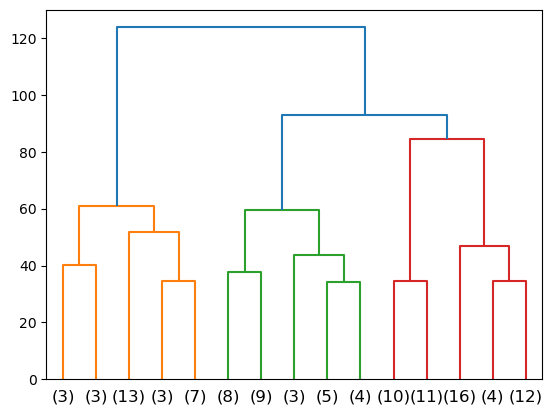

CLUSTER 1
Annotation: go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,generation of precursor metabolites and energy,357,14,29,7,1.137255,50.00,2.621799,0.000026,0.009814,0.009814
1,electron transport chain,357,11,29,6,0.893557,54.55,2.747330,0.000060,0.004992,0.022466
2,respiratory electron transport chain,357,11,29,6,0.893557,54.55,2.747330,0.000060,0.004992,0.022466
3,oxidoreductase activity,357,11,29,6,0.893557,54.55,2.747330,0.000060,0.004992,0.022466
4,electron transfer activity,357,11,29,6,0.893557,54.55,2.747330,0.000060,0.004992,0.022466
5,oxidoreduction-driven active transmembrane tra...,357,11,29,6,0.893557,54.55,2.747330,0.000060,0.004992,0.022466
6,oxidoreductase complex,357,11,29,6,0.893557,54.55,2.747330,0.000060,0.004992,0.022466
7,catalytic complex,357,12,29,6,0.974790,50.00,2.621799,0.000112,0.005299,0.042393
8,energy derivation by oxidation of organic comp...,357,10,29,5,0.812325,50.00,2.621799,0.000475,0.019907,0.179166
9,electron transport coupled proton transport,357,6,29,4,0.487395,66.67,3.036837,0.000476,0.017105,0.179605


(17, 11)
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,oxidoreductase complex,357,11,29,6,0.893557,54.55,2.747330,0.000060,0.002026,0.002026
1,catalytic complex,357,12,29,6,0.974790,50.00,2.621799,0.000112,0.001912,0.003823
2,cytochrome o ubiquinol oxidase complex,357,4,29,3,0.324930,75.00,3.206762,0.001837,0.017842,0.062446
3,cytochrome complex,357,4,29,3,0.324930,75.00,3.206762,0.001837,0.017842,0.062446
4,respiratory chain complex I,357,6,29,3,0.487395,50.00,2.621799,0.008202,0.046477,0.278862
5,respiratory chain complex,357,6,29,3,0.487395,50.00,2.621799,0.008202,0.046477,0.278862
6,plasma membrane respiratory chain complex I,357,6,29,3,0.487395,50.00,2.621799,0.008202,0.046477,0.278862


(7, 11)
Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,oxidoreductase activity,357,11,29,6,0.893557,54.55,2.74733,0.00006,0.003844,0.007687
1,electron transfer activity,357,11,29,6,0.893557,54.55,2.74733,0.00006,0.003844,0.007687
2,oxidoreduction-driven active transmembrane tra...,357,11,29,6,0.893557,54.55,2.74733,0.00006,0.003844,0.007687


(3, 11)
Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,generation of precursor metabolites and energy,357,14,29,7,1.137255,50.00,2.621799,0.000026,0.005571,0.005571
1,electron transport chain,357,11,29,6,0.893557,54.55,2.747330,0.000060,0.005101,0.012753
2,respiratory electron transport chain,357,11,29,6,0.893557,54.55,2.747330,0.000060,0.005101,0.012753
3,energy derivation by oxidation of organic comp...,357,10,29,5,0.812325,50.00,2.621799,0.000475,0.025425,0.101702
4,electron transport coupled proton transport,357,6,29,4,0.487395,66.67,3.036837,0.000476,0.018537,0.101951
5,"energy coupled proton transmembrane transport,...",357,6,29,4,0.487395,66.67,3.036837,0.000476,0.018537,0.101951
6,aerobic respiration,357,7,29,4,0.568627,57.14,2.814444,0.001049,0.029922,0.224413
7,cellular respiration,357,7,29,4,0.568627,57.14,2.814444,0.001049,0.029922,0.224413


(8, 11)
Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3D-structure,357,116,29,19,9.422969,16.38,1.011746,0.000146,0.008627,0.008627
1,Direct protein sequencing,357,55,29,12,4.467787,21.82,1.425402,0.000372,0.010969,0.021939


(2, 11)
Annotation: tcdb_class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.D,357,10,29,6,0.812325,60.0,2.884834,0.000029,0.000258,0.000258


(1, 11)
CLUSTER 2
Annotation: go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,outer membrane,357,27,29,19,2.193277,70.37,3.114839,2.208676e-18,4.078689e-16,6.118033e-16
1,cell outer membrane,357,27,29,19,2.193277,70.37,3.114839,2.208676e-18,4.078689e-16,6.118033e-16
2,wide pore channel activity,357,19,29,12,1.543417,63.16,2.958834,2.537305e-10,2.008096e-08,7.028335e-08
3,porin activity,357,19,29,12,1.543417,63.16,2.958834,2.537305e-10,2.008096e-08,7.028335e-08
4,periplasmic space,357,16,29,11,1.299720,68.75,3.081231,4.592995e-10,2.313199e-08,1.272260e-07
5,outer membrane-bounded periplasmic space,357,16,29,11,1.299720,68.75,3.081231,4.592995e-10,2.313199e-08,1.272260e-07
6,siderophore uptake transmembrane transporter a...,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,5.024969e-06,4.773720e-05
7,cell projection assembly,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,5.024969e-06,4.773720e-05
8,pilus assembly,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,5.024969e-06,4.773720e-05
9,pilus organization,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,5.024969e-06,4.773720e-05


(40, 11)
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,outer membrane,357,27,29,19,2.193277,70.37,3.114839,2.208676e-18,3.239392e-17,4.859088e-17
1,cell outer membrane,357,27,29,19,2.193277,70.37,3.114839,2.208676e-18,3.239392e-17,4.859088e-17
2,periplasmic space,357,16,29,11,1.299720,68.75,3.081231,4.592995e-10,2.887025e-09,1.010459e-08
3,outer membrane-bounded periplasmic space,357,16,29,11,1.299720,68.75,3.081231,4.592995e-10,2.887025e-09,1.010459e-08


(4, 11)
Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,wide pore channel activity,357,19,29,12,1.543417,63.16,2.958834,2.537305e-10,1.370145e-08,2.055217e-08
1,porin activity,357,19,29,12,1.543417,63.16,2.958834,2.537305e-10,1.370145e-08,2.055217e-08
2,siderophore uptake transmembrane transporter a...,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,3.988358e-06,1.395925e-05
3,fimbrial usher porin activity,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,3.988358e-06,1.395925e-05
4,passive transmembrane transporter activity,357,44,29,13,3.574230,29.55,1.862807,4.311543e-06,6.349727e-05,3.492350e-04
5,channel activity,357,44,29,13,3.574230,29.55,1.862807,4.311543e-06,6.349727e-05,3.492350e-04
6,siderophore-iron transmembrane transporter act...,357,10,29,6,0.812325,60.00,2.884834,2.870709e-05,3.321820e-04,2.325274e-03
7,peptide transmembrane transporter activity,357,33,29,10,2.680672,30.30,1.899333,6.817067e-05,6.902281e-04,5.521824e-03
8,amide transmembrane transporter activity,357,35,29,10,2.843137,28.57,1.814444,1.214088e-04,1.092679e-03,9.834115e-03
9,amide binding,357,4,29,3,0.324930,75.00,3.206762,1.836649e-03,1.416843e-02,1.487685e-01


(13, 11)
Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,cell projection assembly,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,0.000012,0.000030
1,pilus assembly,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,0.000012,0.000030
2,pilus organization,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,0.000012,0.000030
3,cell projection organization,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,0.000012,0.000030
4,cellular component assembly,357,10,29,7,0.812325,70.00,3.107226,1.143282e-06,0.000040,0.000199
5,siderophore transport,357,5,29,5,0.406162,100.00,3.621799,2.527602e-06,0.000073,0.000440
6,cellular component organization or biogenesis,357,15,29,7,1.218487,46.67,2.522264,4.609789e-05,0.001069,0.008021
7,cellular component organization,357,15,29,7,1.218487,46.67,2.522264,4.609789e-05,0.001069,0.008021
8,peptide transport,357,35,29,10,2.843137,28.57,1.814444,1.214088e-04,0.002347,0.021125
9,iron coordination entity transport,357,18,29,7,1.462185,38.89,2.259229,1.919189e-04,0.003339,0.033394


(18, 11)
Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Signal,357,46,29,29,3.736695,63.04,2.956218,4.674342e-31,1.636020e-29,1.636020e-29
1,Cell outer membrane,357,27,29,20,2.193277,74.07,3.188840,2.743552e-20,3.840973e-19,9.602433e-19
2,Transmembrane beta strand,357,27,29,20,2.193277,74.07,3.188840,2.743552e-20,3.840973e-19,9.602433e-19
3,Disulfide bond,357,10,29,9,0.812325,90.00,3.469796,4.050243e-10,3.543963e-09,1.417585e-08
4,Periplasm,357,10,29,8,0.812325,80.00,3.299871,2.861365e-08,2.002956e-07,1.001478e-06
5,TonB box,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,9.279656e-07,6.031776e-06
6,Fimbrium biogenesis,357,6,29,6,0.487395,100.00,3.621799,1.723365e-07,9.279656e-07,6.031776e-06
7,Receptor,357,7,29,6,0.568627,85.71,3.399407,1.138599e-06,4.981371e-06,3.985097e-05
8,Direct protein sequencing,357,55,29,14,4.467787,25.45,1.647794,1.150186e-05,4.472947e-05,4.025652e-04
9,3D-structure,357,116,29,20,9.422969,17.24,1.085746,2.944458e-05,1.030560e-04,1.030560e-03


(13, 11)
Annotation: tcdb_class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.B,357,25,29,18,2.030812,72.0,3.147868,1.488541e-17,2.977082e-17,2.977082e-17


(1, 11)
CLUSTER 3
Annotation: go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,anion binding,357,37,53,18,5.492997,48.65,1.712331,1.719642e-07,0.000110,0.000110
1,nucleotide binding,357,34,53,17,5.047619,50.00,1.751860,2.553117e-07,0.000065,0.000163
2,nucleoside phosphate binding,357,34,53,17,5.047619,50.00,1.751860,2.553117e-07,0.000065,0.000163
3,ion binding,357,47,53,20,6.977591,42.55,1.519199,4.719783e-07,0.000075,0.000302
4,adenyl nucleotide binding,357,32,53,16,4.750700,50.00,1.751860,6.515203e-07,0.000069,0.000416
5,ATP binding,357,32,53,16,4.750700,50.00,1.751860,6.515203e-07,0.000069,0.000416
6,adenyl ribonucleotide binding,357,32,53,16,4.750700,50.00,1.751860,6.515203e-07,0.000069,0.000416
7,small molecule binding,357,36,53,17,5.344538,47.22,1.669398,7.545903e-07,0.000060,0.000482
8,ribonucleotide binding,357,33,53,16,4.899160,48.48,1.707466,1.130631e-06,0.000069,0.000722
9,purine nucleotide binding,357,33,53,16,4.899160,48.48,1.707466,1.130631e-06,0.000069,0.000722


(16, 11)
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,ATPase dependent transmembrane transport complex,357,81,53,21,12.025210,25.93,0.804327,0.001983,0.048578,0.097155
1,ATP-binding cassette (ABC) transporter complex,357,77,53,20,11.431373,25.97,0.807001,0.002639,0.043098,0.129295
2,membrane protein complex,357,147,53,31,21.823529,21.09,0.506384,0.004586,0.044944,0.224721
3,protein-containing complex,357,155,53,32,23.011204,20.65,0.475735,0.005542,0.045259,0.271553


(4, 11)
Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,anion binding,357,37,53,18,5.492997,48.65,1.712331,1.719642e-07,0.000037,0.000037
1,nucleotide binding,357,34,53,17,5.047619,50.00,1.751860,2.553117e-07,0.000022,0.000055
2,nucleoside phosphate binding,357,34,53,17,5.047619,50.00,1.751860,2.553117e-07,0.000022,0.000055
3,ion binding,357,47,53,20,6.977591,42.55,1.519199,4.719783e-07,0.000025,0.000101
4,adenyl nucleotide binding,357,32,53,16,4.750700,50.00,1.751860,6.515203e-07,0.000023,0.000139
5,ATP binding,357,32,53,16,4.750700,50.00,1.751860,6.515203e-07,0.000023,0.000139
6,adenyl ribonucleotide binding,357,32,53,16,4.750700,50.00,1.751860,6.515203e-07,0.000023,0.000139
7,small molecule binding,357,36,53,17,5.344538,47.22,1.669398,7.545903e-07,0.000020,0.000161
8,ribonucleotide binding,357,33,53,16,4.899160,48.48,1.707466,1.130631e-06,0.000023,0.000242
9,purine nucleotide binding,357,33,53,16,4.899160,48.48,1.707466,1.130631e-06,0.000023,0.000242


(17, 11)
Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


(0, 11)
Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,ATP-binding,357,42,53,19,6.235294,45.24,1.607470,3.078051e-07,0.000021,0.000021
1,Nucleotide-binding,357,44,53,19,6.532213,43.18,1.540356,7.836009e-07,0.000026,0.000053
2,Translocase,357,37,53,14,5.492997,37.84,1.349761,2.152852e-04,0.004808,0.014424


(3, 11)
Annotation: tcdb_class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.A,357,93,53,25,13.806723,26.88,0.856557,0.000259,0.001293,0.001293


(1, 11)


In [46]:
import matplotlib.pyplot as plt
linkage = hierarchy.linkage(scale(pssm_label1), method="ward")
dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=15)
plt.show()
sublabels = hierarchy.fcluster(linkage, criterion="maxclust", t=3)
sublabels = pd.Series(data=sublabels, index=pssm_label1.index)
analyze_clusters(sublabels)

### More than two clusters

## Hierarchical clustering using ProtNLM Embeddings

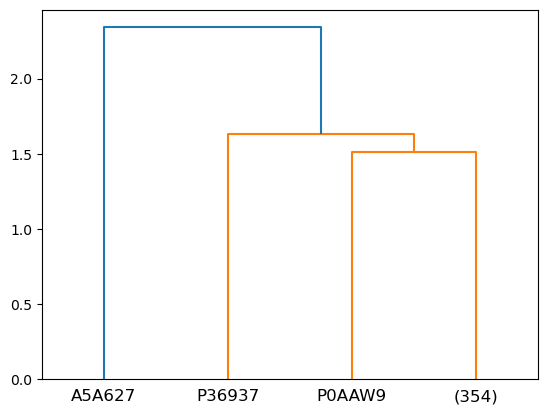

P0AEY8    1
P25527    1
P69423    1
P30130    1
P77463    1
         ..
P31553    1
P75712    1
P0AAE2    1
P31466    1
P46481    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


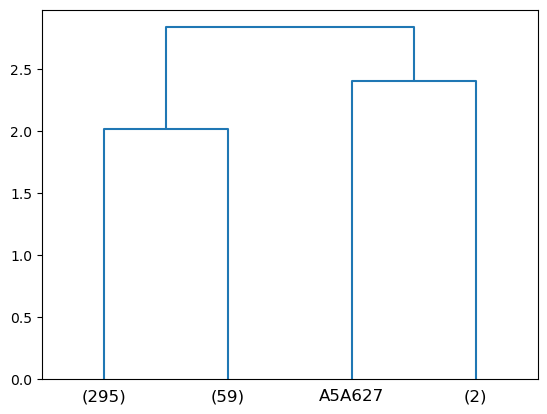

P0AEY8    1
P25527    1
P69423    1
P30130    1
P77463    1
         ..
P31553    1
P75712    1
P0AAE2    1
P31466    1
P46481    1
Length: 357, dtype: int32

P36937    2
P0AAW9    2
A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P36937,kdpF b4513 JW0687,Potassium-transporting ATPase KdpF subunit (AT...,True,1,MSAGVITGVLLVFLLLGYLVYALINAEAF,83333
P0AAW9,acrZ ybhT b0762 JW5102,Multidrug efflux pump accessory protein AcrZ (...,True,1,MLELLKSLVFAVIMVPVVMAIILGLIYGLGEVFNIFSGVGKKDQPGQNH,83333
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


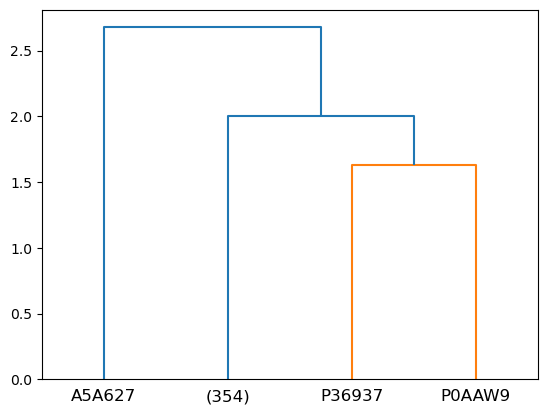

P0AEY8    1
P25527    1
P69423    1
P30130    1
P77463    1
         ..
P31553    1
P75712    1
P0AAE2    1
P31466    1
P46481    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


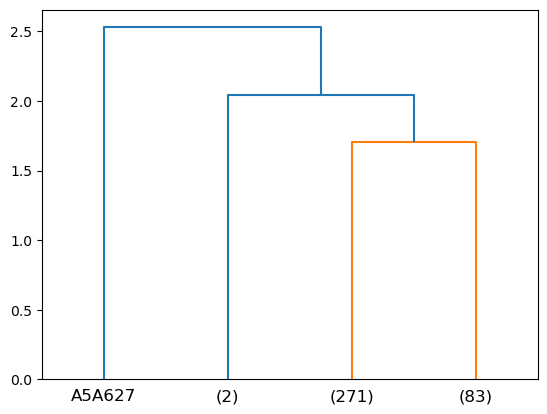

P0AEY8    1
P25527    1
P69423    1
P30130    1
P77463    1
         ..
P31553    1
P75712    1
P0AAE2    1
P31466    1
P46481    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


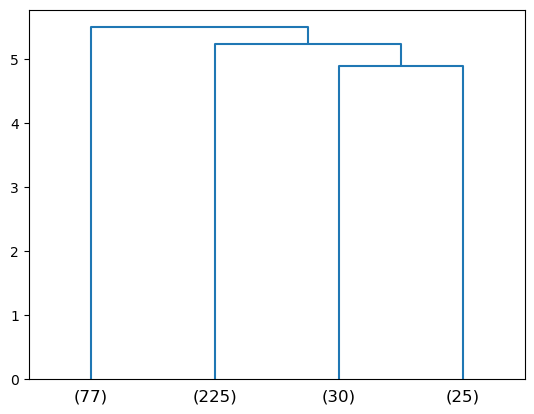

P0AEY8    2
P25527    2
P69423    2
P30130    2
P77463    2
         ..
P31553    1
P75712    2
P0AAE2    2
P31466    2
P46481    2
Length: 357, dtype: int32

P0AEY8    2
P25527    2
P69423    2
P30130    2
P77463    2
         ..
P37019    2
P75712    2
P0AAE2    2
P31466    2
P46481    2
Length: 280, dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P0AEY8,mdfA cmlA cmr b0842 JW0826,Multidrug transporter MdfA (Chloramphenicol re...,True,1,MQNKLASGARLGRQALLFPLCLVLYEFSTYIGNDMIQPGMLAVVEQ...,83333
P25527,gabP b2663 JW2638,Gamma-aminobutyric acid permease (GABA permeas...,True,1,MGQSSQPHELGGGLKSRHVTMLSIAGVIGASLFVGSSVAIAEAGPA...,83333
P69423,tatC mttB yigU yigV b3839 JW3815,Sec-independent protein translocase protein TatC,True,1,MSVEDTQPLITHLIELRKRLLNCIIAVIVIFLCLVYFANDIYHLVS...,83333
P30130,fimD b4317 JW5780,Outer membrane usher protein FimD,True,1,MSYLNLRLYQRNTQCLHIRKHRLAGFFVRLVVACAFAAQAPLSSAD...,83333
P77463,ddpC yddQ b1485 JW1480,"Probable D,D-dipeptide transport system permea...",True,1,MMLSEETSAVRPQKQTRFNGAKLVWMLKGSPLTVTSAVIIVLMLLM...,83333
...,...,...,...,...,...,...
P37019,clcA eriC yadQ b0155 JW5012,H(+)/Cl(-) exchange transporter ClcA (ClC-ec1),True,1,MKTDTPSLETPQAARLRRRQLIRQLLERDKTPLAILFMAAVVGTLV...,83333
P75712,ybbW glxB2 b0511 JW0499,Putative allantoin permease (Allantoin transpo...,True,1,MEHQRKLFQQRGYSEDLLPKTQSQRTWKTFNYFTLWMGSVHNVPNY...,83333
P0AAE2,proY yajM b0402 JW5055,Proline-specific permease ProY,True,1,MESKNKLKRGLSTRHIRFMALGSAIGTGLFYGSADAIKMAGPSVLL...,83333
P31466,adeP purP yieG b3714 JW3692,Adenine permease AdeP,True,1,MSHQHTTQTSGQGMLERVFKLREHGTTARTEVIAGFTTFLTMVYIV...,83333


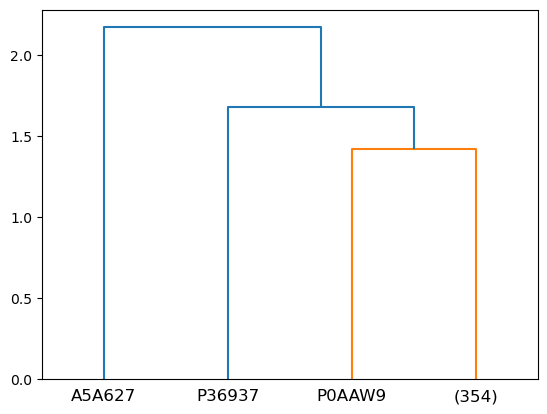

P0AEY8    1
P25527    1
P69423    1
P30130    1
P77463    1
         ..
P31553    1
P75712    1
P0AAE2    1
P31466    1
P46481    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


In [48]:
import matplotlib.pyplot as plt


#TODO refactor
for method in ["single","complete","average","weighted","ward","median"]:
    linkage = hierarchy.linkage(feature_protnlm, method=method, metric="euclidean")
    dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=4, labels=feature_protnlm.index)
    plt.show()
    labels = hierarchy.fcluster(linkage, criterion="maxclust", t=2)
    # labels = hierarchy.fcluster(linkage)
    labels = pd.Series(data=labels, index=feature_protnlm.index)
    labels.value_counts()
    display(labels)
    display(labels[labels==2])
    display(sequences.loc[labels[labels==2].index])

In [49]:
# TODO write analysis about the two clusters, and the multiple clusters
# TODO different reference sets for each cluster?
# TODO try specialized R packages for GO enrichment and compare
# TODO add percentage of terms contained
# TODO compare features: different PSSMs, combined pssms, embeddings
# TODO turn code into py file!
    # Create dendrogram from feature df; and plot it (dataframe, )
    # Get the proteins in the clusters
    # Get enrichment for each cluster and each annotation dataset.
# TODO tcdb bar plot for each subcluster: what is the distribution?
# TODO rand metric?